## Earthquake Damage Prediction Mini Project

In [18]:
#Importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# Load the data
df =pd.read_csv("earthquake_damage_data.csv")
df

,magnitude,depth_km,buildings_affected,population_density,damage_level
0,6.7,10,1000,500,High
1,5.2,30,200,300,Medium
2,4.8,15,50,100,Low
3,7.1,8,1500,700,High
4,6.3,12,500,450,Medium
5,5.5,25,300,320,Medium
6,4.3,18,30,90,Low
7,6.9,11,1200,650,High
8,5.8,20,350,400,Medium
9,4.9,14,60,150,Low


In [20]:
# Define the explicit order of categories
damage_order = [['Low', 'Medium', 'High']]

# Create and apply the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=damage_order)
df['damage_level_encoded'] = ordinal_encoder.fit_transform(df[['damage_level']]).astype(int) # use .astype(int) when using OrdinalEncoder if we want our encoded values to be clean integers (0, 1, 2) instead of floats (0.0, 1.0, 2.0) 
df

,magnitude,depth_km,buildings_affected,population_density,damage_level,damage_level_encoded
0,6.7,10,1000,500,High,2
1,5.2,30,200,300,Medium,1
2,4.8,15,50,100,Low,0
3,7.1,8,1500,700,High,2
4,6.3,12,500,450,Medium,1
5,5.5,25,300,320,Medium,1
6,4.3,18,30,90,Low,0
7,6.9,11,1200,650,High,2
8,5.8,20,350,400,Medium,1
9,4.9,14,60,150,Low,0


In [21]:
# Features and targets
X = df.drop(["damage_level", "damage_level_encoded"], axis=1)
y = df["damage_level_encoded"]

Classification Report:

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         1
        High       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



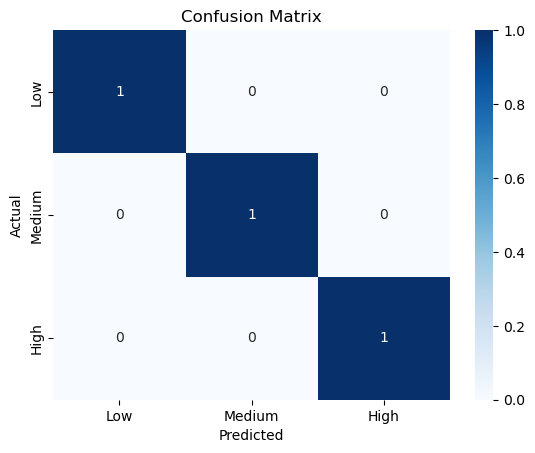

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# For evaluation, labels are integers 0,1,2 corresponding to Low, Medium, High
labels = [0, 1, 2]

# Decode labels back to original names for reports and plots
target_names = ordinal_encoder.categories_[0]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

# Confusion matrix
con_mat = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(con_mat, annot=True, cmap='Blues',xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Predicted Damage Level: High


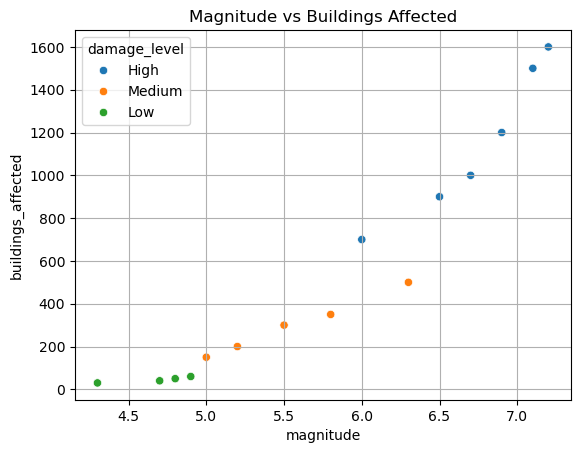

In [23]:
# Predicting new data
new_data = pd.DataFrame({
    'magnitude': [6.4],
    'depth_km': [10],
    'buildings_affected': [800],
    'population_density': [480]
})

prediction = model.predict(new_data)

# Decode the prediction label back to string label
predicted_label = ordinal_encoder.inverse_transform(prediction.reshape(-1, 1))  #ordinal encoder takes 2D array for inverse_transform
print("Predicted Damage Level:", predicted_label[0][0])

# Optional plot
sns.scatterplot(data=df, x='magnitude', y='buildings_affected', hue='damage_level')
plt.title("Magnitude vs Buildings Affected")
plt.grid(True)
plt.show()